Jennifer MacDonald, 604501712
CS249--Spring 2017--D.S. Parker © 2017
04/23/17

# Problem: Fitting Distribution Parameters to Data

Problem: given a sequence of random real values, attempt to determine which distribution it follows.

More specifically, develop a program that reads in a numeric table, and -- for each dataset in the table (where each column in the table is a "dataset") -- determines the distribution and parameters that gives the closest match to it.

## Setup

### fitdistr

This program uses the "fitdistr" function in the MASS library in order to fit distributions to data. To use fitdir, I installed the MASS package in R

In [1]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])
if (not.installed("MASS"))
    install.packages("MASS")  # we need the MASS package
library(MASS)  # Load the MASS package

### set.seed()

In [2]:
# Set seed to guarantee consistent output
set.seed(123)

### Read in table and get row & column length

In [3]:
#  Read in a table (in csv format) from standard input:
Table = data.matrix(read.csv( file("hw1_test_file.csv"), header=TRUE )) # Read in the hw1 text file

# Get the number of rows and columns from the table
n = nrow(Table)
p = ncol(Table)

## Kinds of distributions:

In [4]:
# The program handles there kinds of distributions:
Distribution = c( "normal", "t", "chi-squared", "lognormal", "exponential", "gamma", "logistic")
Distribution_can_have_negative_values = c( TRUE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE )
Distribution_function = c(dnorm, dt, dchisq, dlnorm, dexp, dgamma, dlogis)
Distribution_color = c("blue", "cyan", "green", "gold", "magenta", "red", "purple") 

add_curve = function( dist_name, p ) {
    if (dist_name == "normal")      curve( dnorm(x, p[1], p[2] ),    col="blue", lwd=3, add=TRUE )
    if (dist_name == "t")           curve( dt(x, p[1], p[2], p[3] ), col="cyan", lwd=3, add=TRUE )
    if (dist_name == "chi-squared") curve( dnorm(x, p[1] ),          col="green", lwd=3, add=TRUE )
    if (dist_name == "lognormal")   curve( dlnorm(x, p[1], p[2] ), col="gold", lwd=3, add=TRUE )
    if (dist_name == "exponential") curve( dexp(x, p[1] ),         col="magenta", lwd=3, add=TRUE )
    if (dist_name == "gamma")       curve( dgamma(x, p[1], p[2] ),  col="red", lwd=3, add=TRUE )
    if (dist_name == "logistic")    curve( dlogis(x, p[1], p[2] ),  col="purple", lwd=3, add=TRUE )
}

## Analyzing the data in R, with fitdistr:


trying Dataset 1:
Dataset is nonnegative
normal 4 3
               log-likelihood = -24419.095747
t 4 2 5
               log-likelihood = -24035.945475
chi-squared 4
               log-likelihood = -22580.732340
lognormal 1 1
               log-likelihood = -22995.743010
exponential 0
               log-likelihood = -23778.346244
gamma 2 1
               log-likelihood = -22579.654986
logistic 4 1
               log-likelihood = -24087.035660

trying Dataset 2:
Dataset is nonnegative


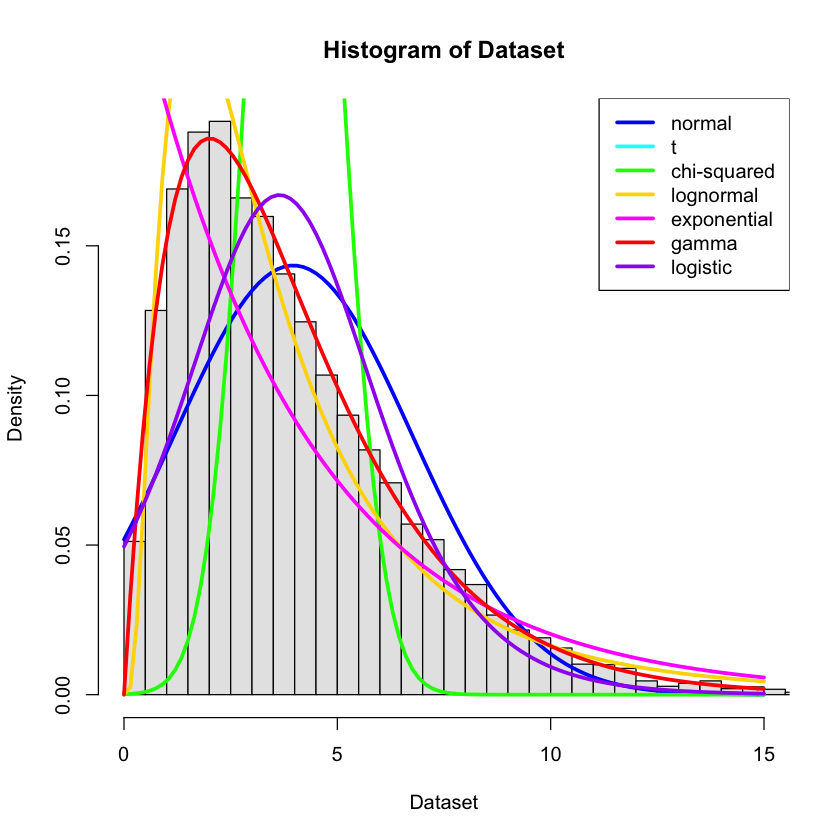

normal 1 1
               log-likelihood = -14430.775977
t 1 1 3
               log-likelihood = -13149.777894
chi-squared 1
               log-likelihood = -10777.018318
lognormal -1 1
               log-likelihood = -10931.260454
exponential 1
               log-likelihood = -10098.049493
gamma 1 1
               log-likelihood = -10097.451601
logistic 1 1
               log-likelihood = -13562.209755

trying Dataset 3:
Dataset has some negative values, so it cannot follow nonnegative distributions


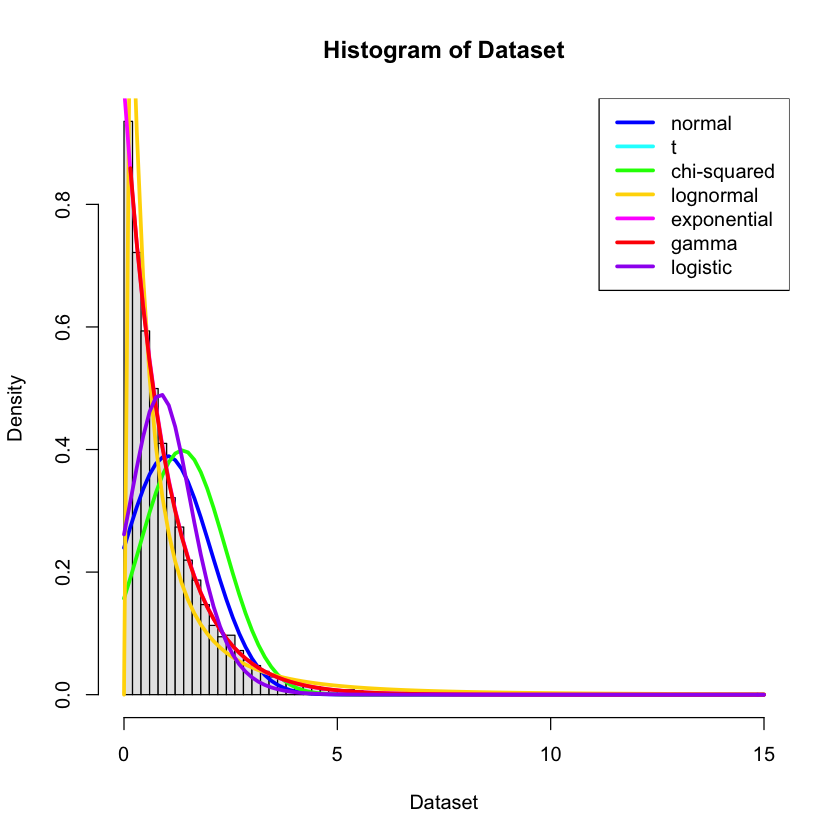

normal 3 2
               log-likelihood = -21252.869188
t 3 2 88
               log-likelihood = -21253.982403
logistic 3 1
               log-likelihood = -21355.497905

trying Dataset 4:
Dataset is nonnegative


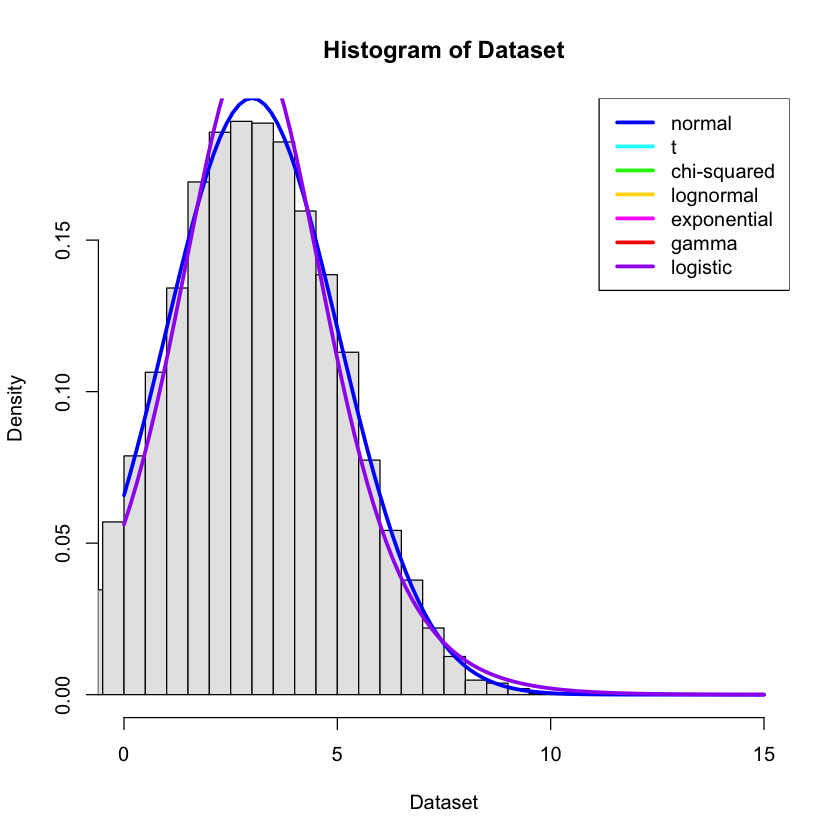

normal 4 6
               log-likelihood = -31649.336709
t 3 2 1
               log-likelihood = -27011.669465
chi-squared 4
               log-likelihood = -26200.259701
lognormal 1 1
               log-likelihood = -24259.288773
exponential 0
               log-likelihood = -25039.590047
gamma 1 0
               log-likelihood = -24984.414856
logistic 4 2
               log-likelihood = -28974.186667

trying Dataset 5:
Dataset has some negative values, so it cannot follow nonnegative distributions


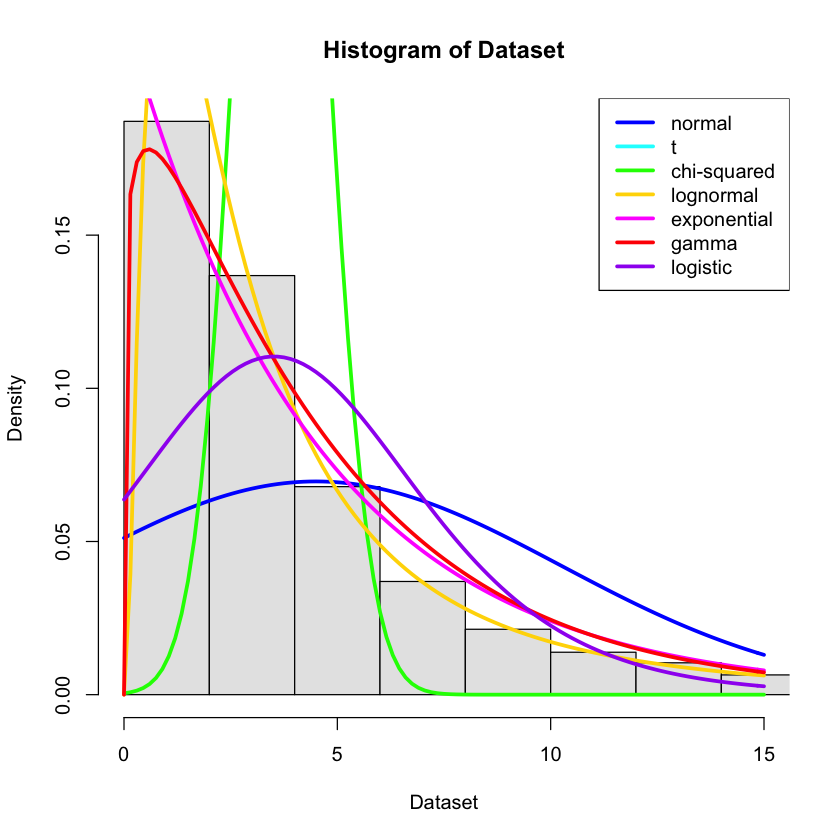

normal 3 4
               log-likelihood = -27086.755374
t 3 3 8
               log-likelihood = -26950.478749
logistic 3 2
               log-likelihood = -26946.108452

trying Dataset 6:
Dataset is nonnegative


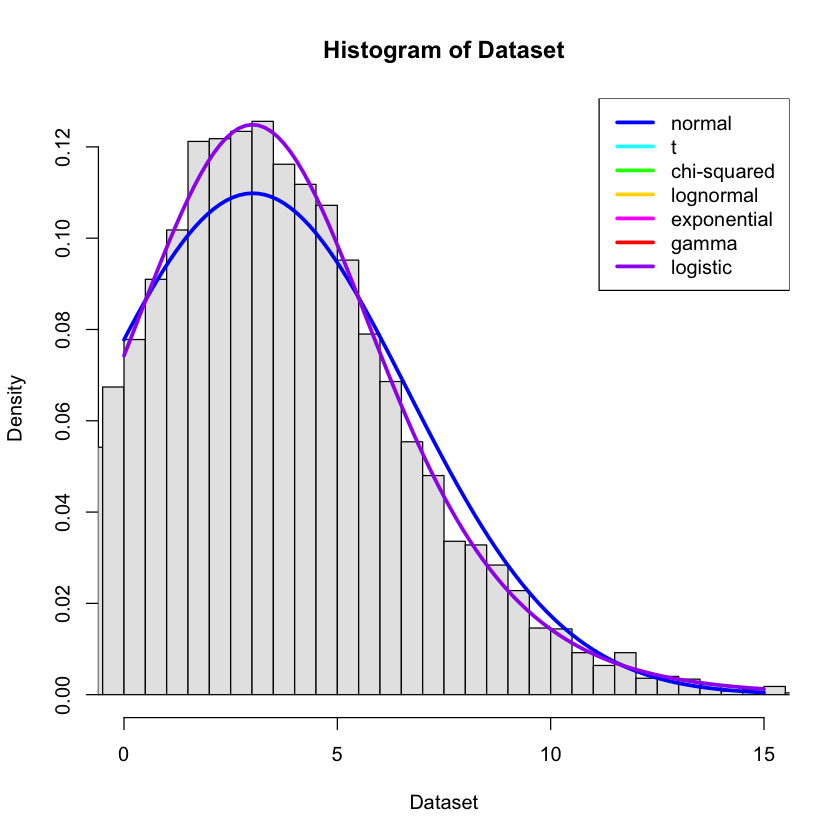

normal 2 1
               log-likelihood = -15248.206409
t 2 1 9
               log-likelihood = -15137.989615
chi-squared 3
               log-likelihood = -17543.121835
lognormal 1 0
               log-likelihood = -14669.330532
exponential 0
               log-likelihood = -19102.239655
gamma 5 2
               log-likelihood = -14520.329003
logistic 2 1
               log-likelihood = -15150.879783


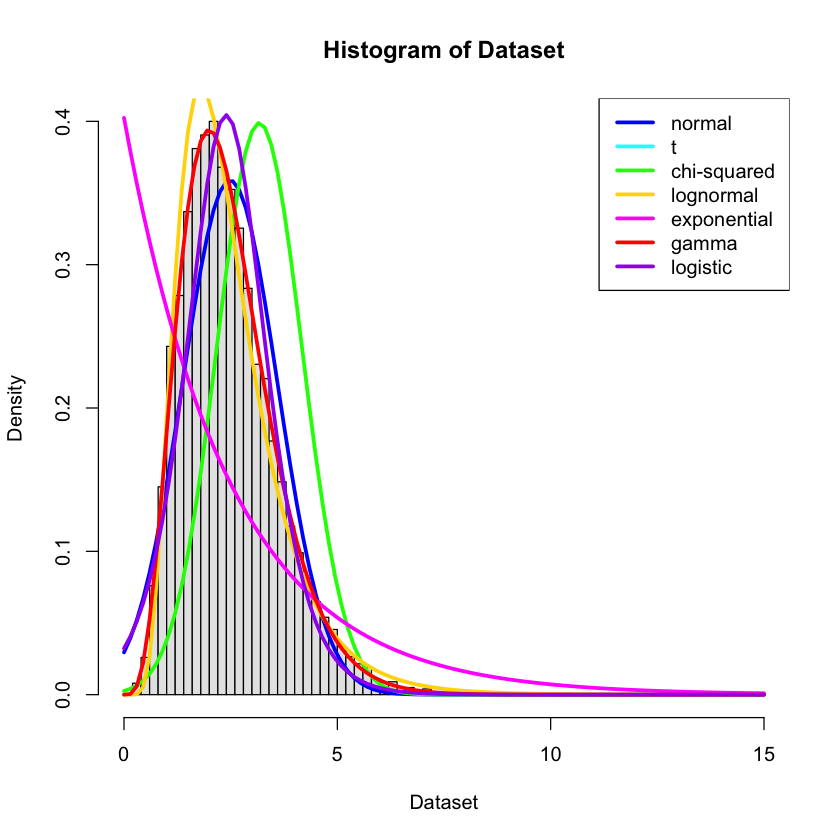

In [5]:
# Array that will contain each datasets optimal distribution
opDistResults <- vector()

for (j in 1:p) {
    Dataset = Table[,j]        #  j-th dataset = the j-th column of the table
    cat(sprintf("\ntrying Dataset %d:\n", j))
    
    Dataset_is_nonnegative = !any( Dataset < 0 )
    if (Dataset_is_nonnegative) {
        cat("Dataset is nonnegative\n")
    } else {
        cat("Dataset has some negative values, so it cannot follow nonnegative distributions\n")
    }
    
    hist( Dataset, col="gray90", xlim=c(0,15), breaks=50, probability=TRUE )
    # display a histogram for each column Dataset
    legend( "topright", Distribution, col=Distribution_color, lwd=3 )
    
    # Create a variable to keep track of the current largest log likelihood value
    maxLogLikelihood <- c(.Machine$integer.max * (-1))
    
    for (i in 1:length(Distribution)) {
        dist_name = Distribution[i]
        if (Distribution_can_have_negative_values[i] || Dataset_is_nonnegative) {
            # don't try to fit a nonnegative distribution to data that is negative

            if (dist_name == "chi-squared") {
                # fitdistr requires special handling of chi-squared
                fit = suppressWarnings( fitdistr( Dataset, dist_name,
                                  list(df=round(mean(Dataset))), method="BFGS" ) )
            } else {
                fit = suppressWarnings( fitdistr( Dataset, dist_name ) )
            }
            
            # "fit" is the object returned by fitdistr, describing the fit 
            
            fitted_parameters = fit$estimate
            log_likelihood = fit$loglik
            
            parameter_value_string = paste(round(fitted_parameters), collapse=" ")
            # print integer parameters
            
            # This is the output of each dataset distribution's parameter values:
            cat(sprintf("%s %s\n", dist_name, parameter_value_string))
            
            # To show how good the fit is, we also print the log-likelihood here
            cat(sprintf("               log-likelihood = %f\n", log_likelihood))
            
            # If the log_likelihood is greater than the current stored max log likelihood, update the current optimal             # distribution and max log likelihood
            if(log_likelihood > maxLogLikelihood)
            {
                curOpDistName <- dist_name
                curOpParmValStr <- parameter_value_string
                maxLogLikelihood = log_likelihood
            }
            
            add_curve( dist_name, fitted_parameters )  # show the fit on the histogram
            
            # The optimal distribution is the one with maximum-likelihood
            #  (and:  maximum-likelihood == maximum-log-likelihood).
        }
    }
    
    # Push each dataset's optimal distribution into the array
    opDistResults <- c(opDistResults, paste(curOpDistName, curOpParmValStr, sep = " "))
}

## Program's output

In [6]:
# Print out the optimal distribution for each dataset
for (i in 1:p)
{
    cat(sprintf("%s\n", opDistResults[i]))
}

gamma 2 1
gamma 1 1
normal 3 2
lognormal 1 1
logistic 3 2
gamma 5 2
